In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [2]:
# loading the dataset
insurance_data = pd.read_csv('insurance.csv')

In [3]:
# exploring the data
print(insurance_data.shape)

(1338, 7)


In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# checking for missing values
print(insurance_data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


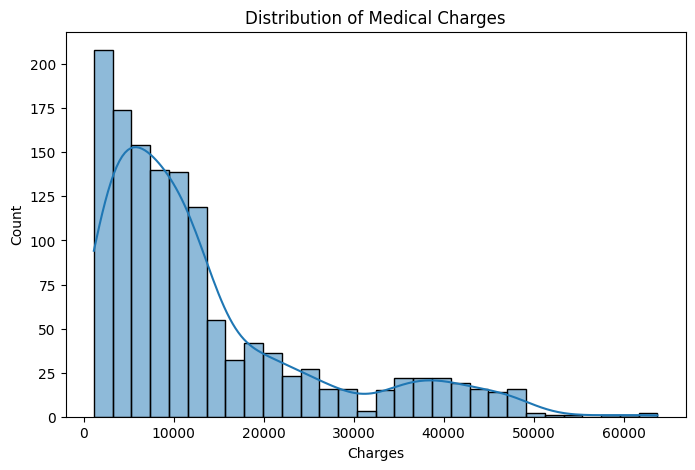

In [8]:
# exploring the distribution of 'charges' (target variable)
plt.figure(figsize=(8, 5))
sns.histplot(insurance_data['charges'], kde = True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

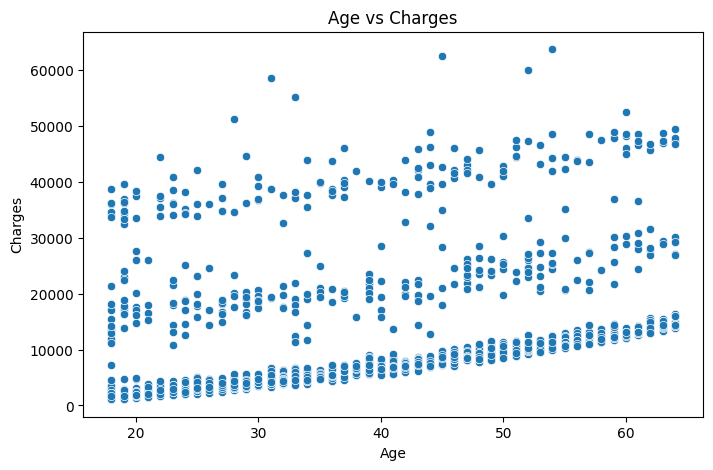

In [9]:
# exploring the relationship between 'age' and 'charges'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=insurance_data)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

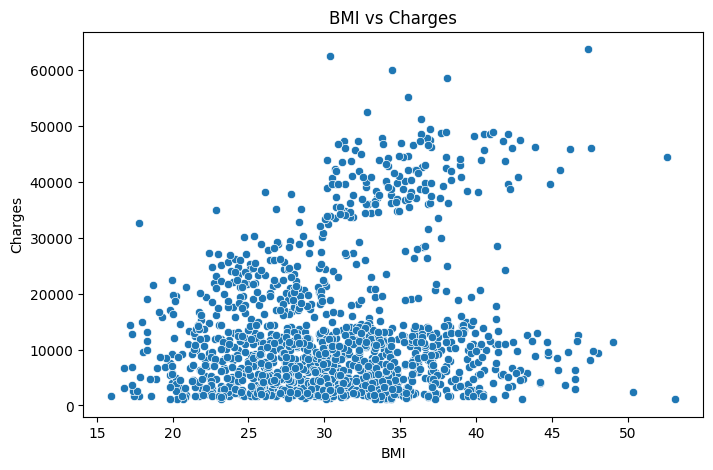

In [10]:
# exploring the relationship between 'bmi' and 'charges'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', data=insurance_data)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

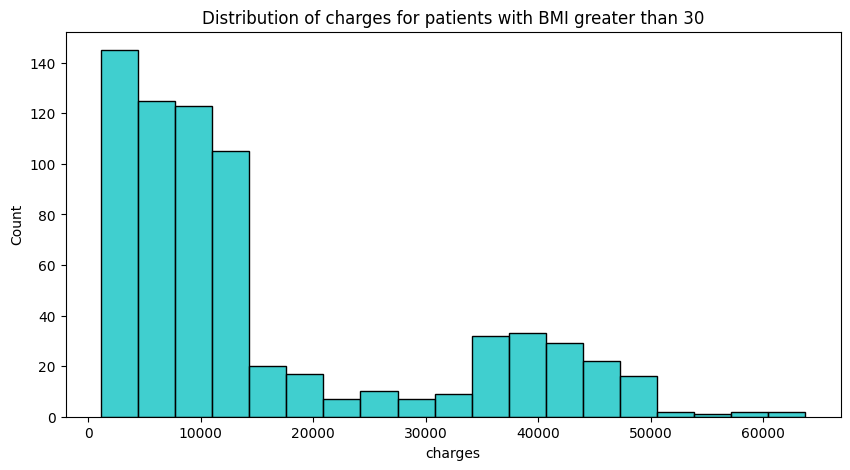

In [11]:
plt.figure(figsize=(10, 5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.histplot(insurance_data[insurance_data['bmi'] >= 30]['charges'], color='c')
plt.show()

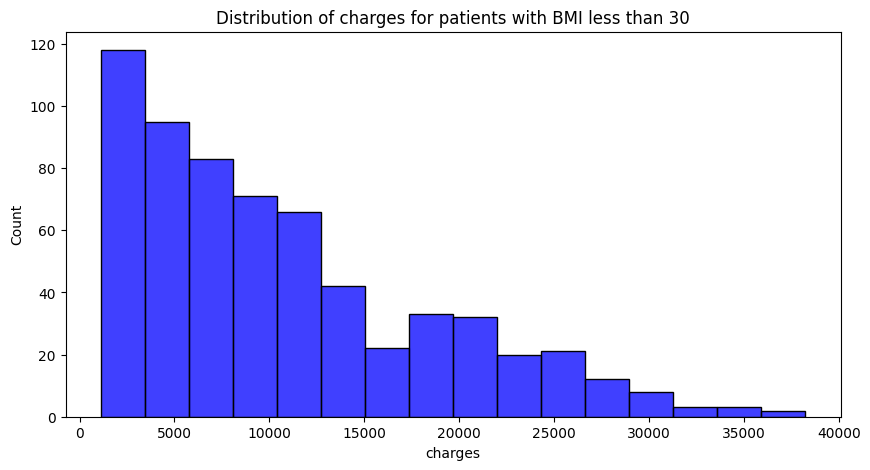

In [12]:
plt.figure(figsize=(10,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.histplot(insurance_data[(insurance_data.bmi < 30)]['charges'], color = 'b')

c:\Users\srini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


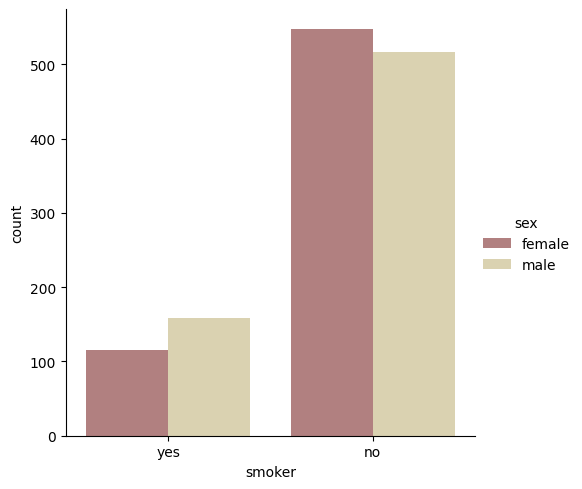

In [13]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=insurance_data)

c:\Users\srini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


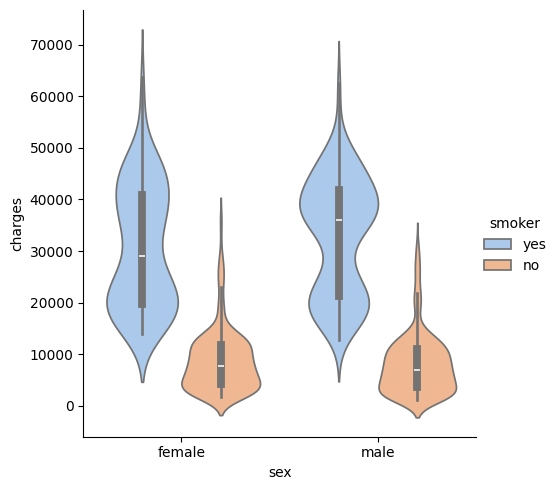

In [14]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=insurance_data, palette = 'pastel')

c:\Users\srini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


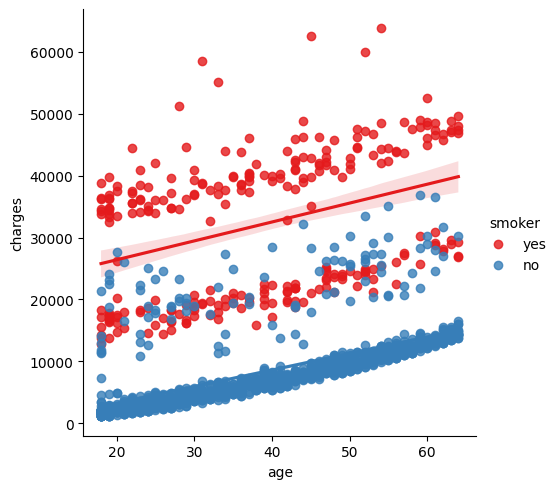

In [18]:
a = sns.lmplot(x = 'age', y = 'charges', data=insurance_data, hue='smoker', palette='Set1')

c:\Users\srini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


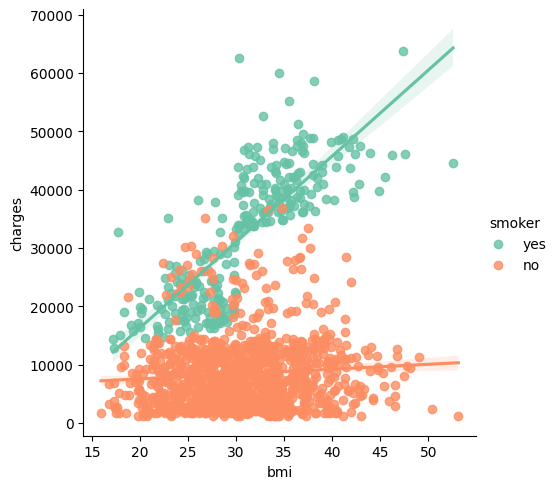

In [16]:
b = sns.lmplot(x = 'bmi', y = 'charges', data=insurance_data, hue='smoker', palette='Set2')

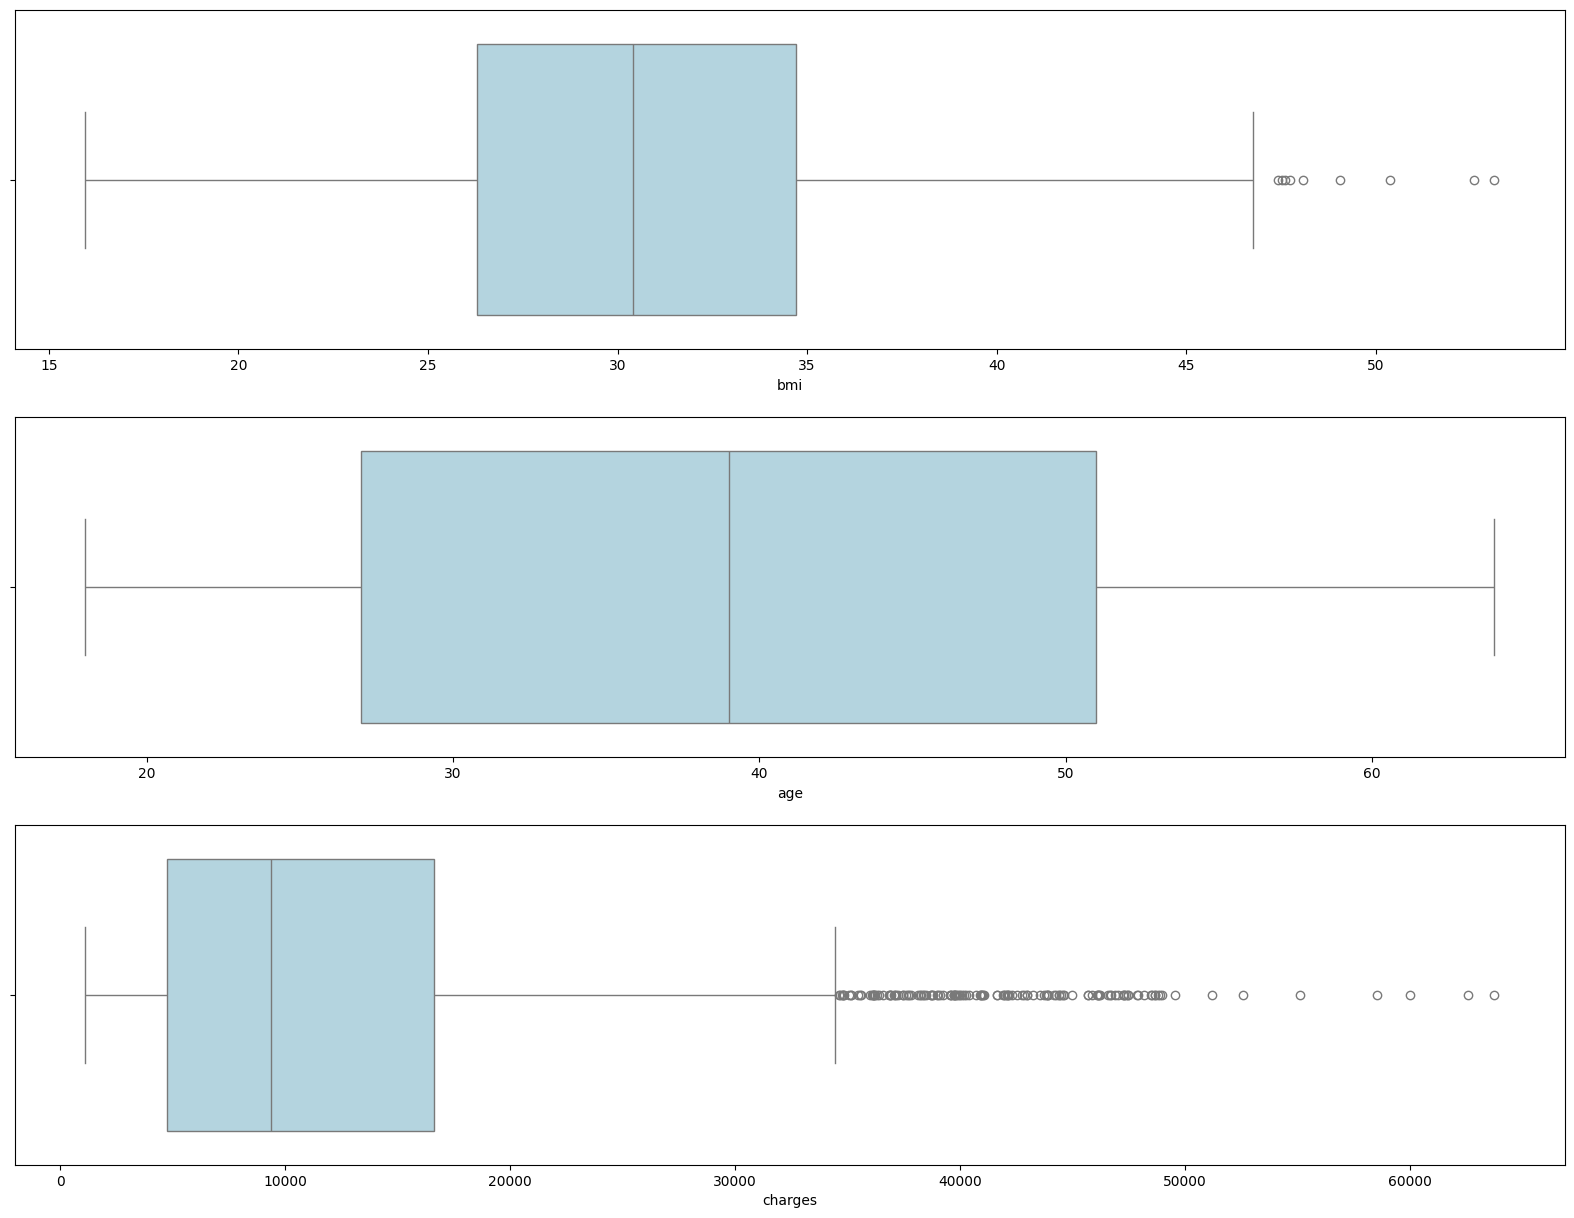

In [19]:
# checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_data.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= insurance_data.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_data.charges, color='lightblue')

plt.show()

Text(0.5, 1.0, 'Smoker distribution')

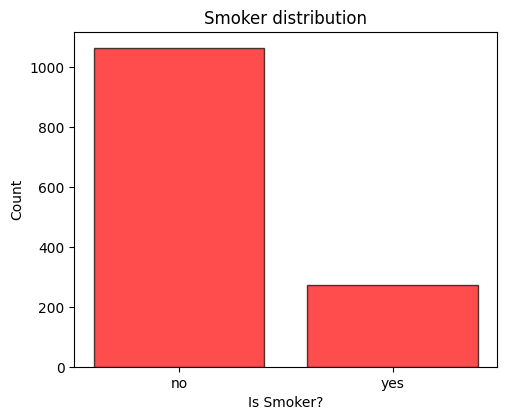

In [20]:
plt.figure(figsize=(12,20))


x = insurance_data.smoker.value_counts().index    
y = [insurance_data['smoker'].value_counts()[i] for i in x]   

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Is Smoker?')
plt.ylabel('Count')
plt.title('Smoker distribution')

Text(0.5, 1.0, 'Gender distribution')

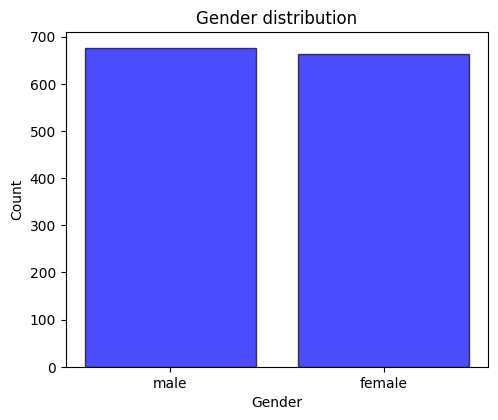

In [21]:
plt.figure(figsize=(12,20))

x1 = insurance_data.sex.value_counts().index    
y1 = [insurance_data['sex'].value_counts()[j] for j in x1]   

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

Text(0.5, 1.0, "Region's distribution")

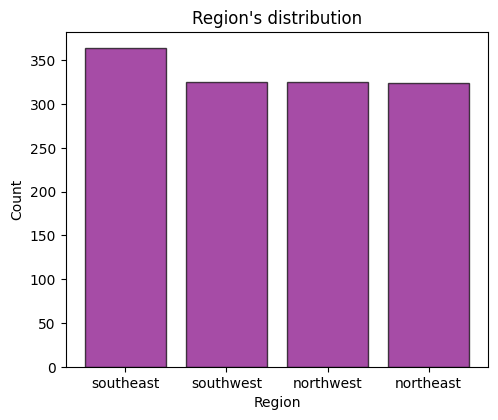

In [22]:
plt.figure(figsize=(12,20))

x2 = insurance_data.region.value_counts().index    
y2 = [insurance_data['region'].value_counts()[k] for k in x2]   

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'purple',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Region')
plt.ylabel('Count')
plt.title("Region's distribution")

Text(0.5, 1.0, 'Children distribution')

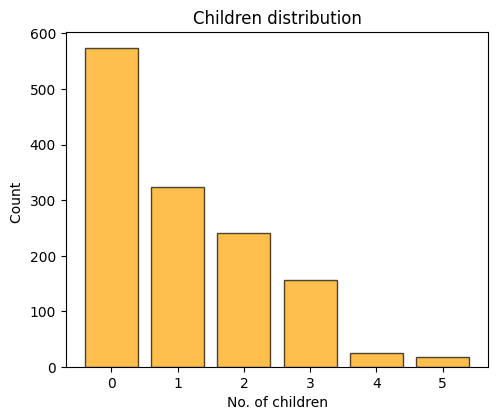

In [23]:
plt.figure(figsize=(12,20))

x3 = insurance_data.children.value_counts().index    
y3 = [insurance_data['children'].value_counts()[l] for l in x3]   

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'orange',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

c:\Users\srini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


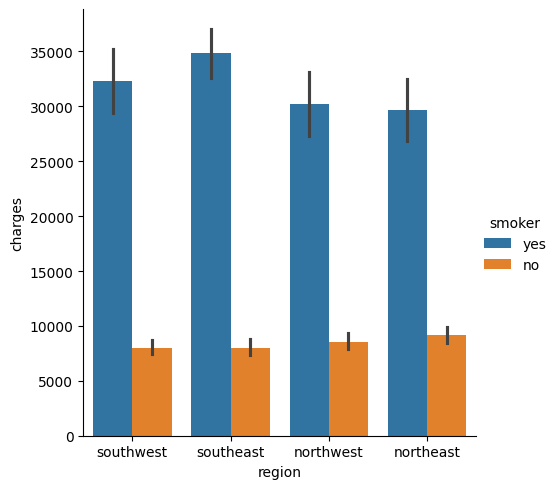

In [24]:
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=insurance_data)
plt.show()

In [25]:
# converting categorical variables to numerical using one hot encoding
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])

In [26]:
insurance_data.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [27]:
insurance_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [28]:
insurance_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [29]:
insurance_data.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


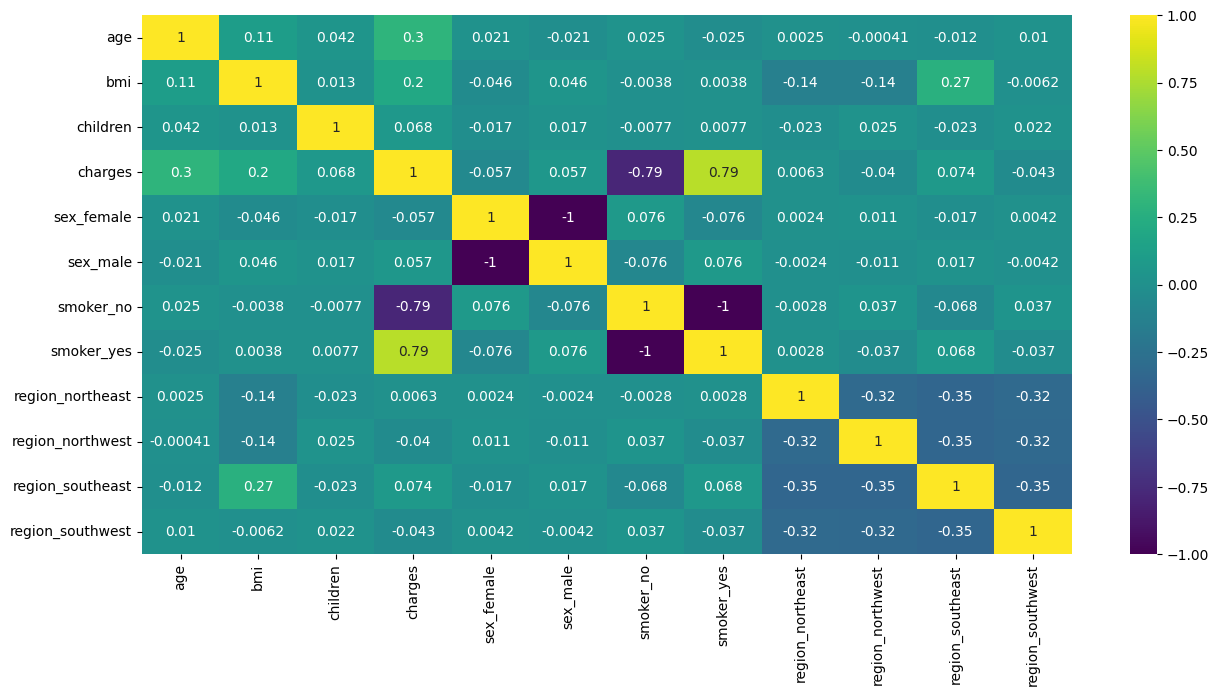

In [30]:
correlation_Matrix = insurance_data.corr() 
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_Matrix, annot=True, cmap='viridis') 
plt.show() 

In [31]:
columns_to_convert = ['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

for column in columns_to_convert:
    insurance_data[column] = insurance_data[column].astype(int)

In [32]:
# splitting the data into features X and target variable y
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']


# creating an OLS model
model = sm.OLS(y, X)

# Fitting the model to the data
results = model.fit()

# Printing the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:50:42   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899  

In [33]:
# Define the feature matrix
X = insurance_data.drop('charges', axis=1)
# Define the target variable
y = insurance_data['charges']

#Feature Selection

# Function to perform Stepwise Regression
def stepwise_regression(X, y, pvalue_threshold=0.05):
    selected_features = []
    
    while True:
        remaining_features = list(set(X.columns) - set(selected_features))
        best_pvalue = 1.0
        best_feature = None
        
        for i in remaining_features:
            current_features = selected_features + [i]
            X_constant = sm.add_constant(X[current_features])
            model = sm.OLS(y, X_constant)
            results = model.fit()
            pvalue = results.pvalues[i]
            
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = i
        
        if best_pvalue > pvalue_threshold:
            break
        
        selected_features.append(best_feature)
        print(results.summary())
    
    return selected_features

# Perform Stepwise Regression
selected_features = stepwise_regression(X, y)
print("Selected Features:", selected_features)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          8.27e-283
Time:                        11:53:28   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8434.2683    229.014     36.829      0.0

In [34]:
features = pd.DataFrame({"Selected Features": selected_features})
features.head(6)

,Selected Features
0,smoker_no
1,age
2,smoker_yes
3,bmi
4,children
5,region_northeast


In [35]:
# Define the feature matrix
X = insurance_data[['smoker_no', 'age', 'smoker_yes', 'bmi', 'children', 'region_northeast']]
# Define the target variable
y = insurance_data['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Training Model
    
    # Making Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Checking regression metrics
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)

    model_train_r2 = r2_score(y_train, y_train_pred)
    model_test_r2 = r2_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    print('Model Performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('Model Performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('=' * 20)
    print('\n')

Linear Regression
Model Performance for Training set
- Mean Squared Error: 37301509.7188
- R2 Score: 0.7416
Model Performance for Test set
- Mean Squared Error: 33742677.1201
- R2 Score: 0.7827


Decision Tree
Model Performance for Training set
- Mean Squared Error: 244463.0320
- R2 Score: 0.9983
Model Performance for Test set
- Mean Squared Error: 37259052.9296
- R2 Score: 0.7600


Random Forest
Model Performance for Training set
- Mean Squared Error: 3706956.1228
- R2 Score: 0.9743
Model Performance for Test set
- Mean Squared Error: 21544416.4866
- R2 Score: 0.8612


Support Vector Machine
Model Performance for Training set
- Mean Squared Error: 158439543.2221
- R2 Score: -0.0977
Model Performance for Test set
- Mean Squared Error: 166473706.7185
- R2 Score: -0.0723


K-Nearest Neighbors
Model Performance for Training set
- Mean Squared Error: 66296079.6808
- R2 Score: 0.5407
Model Performance for Test set
- Mean Squared Error: 110033472.1616
- R2 Score: 0.2912


